In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from PIL import Image
ImageTotal = numpy.asarray(Image.open('testing_plant.jpg'))

#Choose sample plant
ImageTemplate = numpy.asarray(Image.open('noplant.png'))

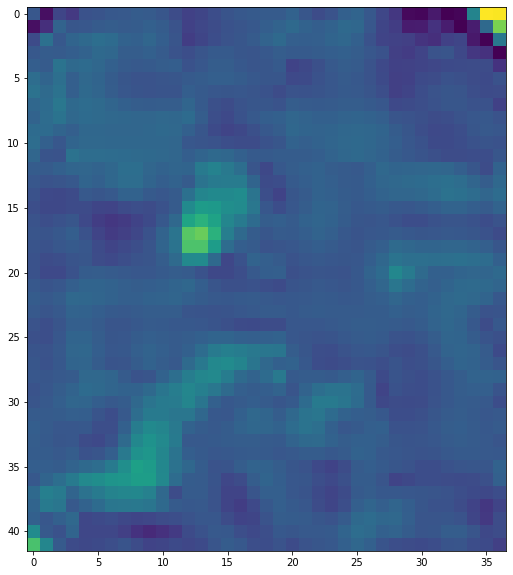

In [32]:
#Work with one band

image = ImageTotal[:,:,1]
imtemp = ImageTemplate[:,:,1]
imshow(imtemp)

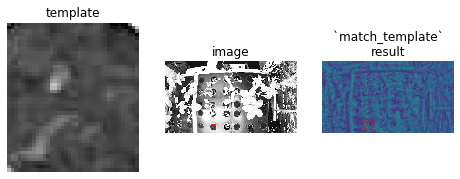

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

result = match_template(image,imtemp)

ij = np.unravel_index(np.argmax(result),result.shape)
X, y = ij[::-1]

fig = plt.figure(figsize = (8,3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable = 'box')
ax3 = plt.subplot(1, 3, 3, sharex = ax2, sharey = ax2, adjustable = 'box')

ax1.imshow(imtemp, cmap = plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap = plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')

#highlight matched region
h, w = imtemp.shape
rect = plt.Rectangle((X,y), w, h, edgecolor = 'r', facecolor = 'none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')

ax3.autoscale(False)
ax3.plot(X, y, 'o', markeredgecolor = 'r', markerfacecolor = 'none', markersize = 10)

plt.show()

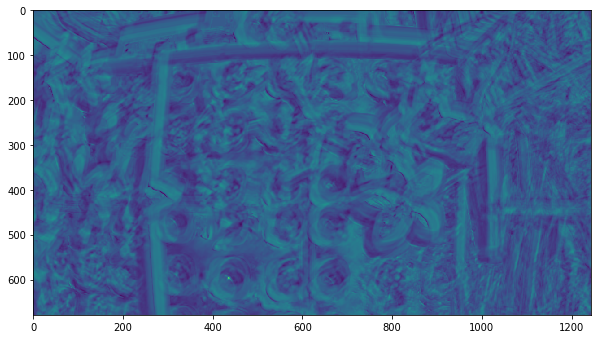

<Figure size 720x720 with 0 Axes>

In [34]:
#closer look at match template
imshow(result);
figure(figsize = (10,10));

In [35]:
resultfilter = np.where(result>0.90)
resultmax = np.where(result>0.99)

In [36]:
#parameters for figure layout
print(shape(resultfilter))
print(shape(result))
print(shape(image))

(2, 1)
(679, 1244)
(720, 1280)


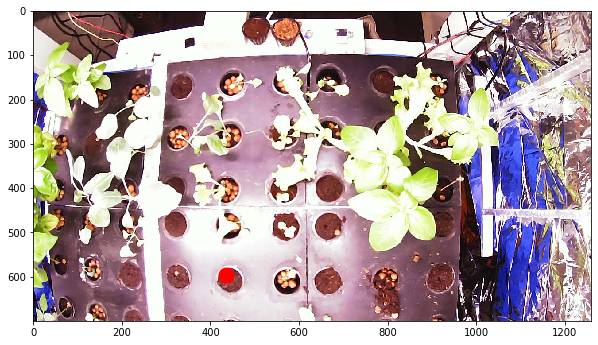

In [37]:
#show interpreted results and the best match
for point in range(shape(resultfilter)[1]):
    plot(resultfilter[1][point], resultfilter[0][point], 'o', markeredgecolor = 'r', markerfacecolor = 'none', markersize = 10)

plot(resultmax[1][0], resultmax[0][0], 'o', markeredgecolor = 'r', markerfacecolor = 'r', markersize = 15)

imshow(ImageTotal[10:-10,10:-10,:])
figsize(10,10)